In [2]:
# Libraries
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set background color of graphics to dark
# plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Read the data
df_orig = pd.read_csv('../autoscout24_data.csv', sep=";")

# Show the number of rows and columns
print(df_orig.shape)

# Print the first 10 rows and a selected number of columns
df_orig.iloc[:10,1:12]

/Users/lara/Documents/Lara's scientific programming/scientific_programming/Week_05/exercises/mySolutions
(3980, 19)


,Offer_Id,Scrape_Dt,Type,Price,HP,Init_Regist,Mileage,Fuel_Type,Transmission,Dealer_Name,Dealer_PLZ
0,7324420,2020_03_17 07:34:45,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,***confidential***,8488
1,7512768,2020_03_17 07:34:55,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,***confidential***,3186
2,7512034,2020_03_17 07:35:03,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,***confidential***,1262
3,7512728,2020_03_17 07:35:06,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,4314
4,7490242,2020_03_17 07:35:16,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,3250
5,7512188,2020_03_17 07:36:44,MERCEDES-BENZ SLK 200 Kompressor (Cabriolet),CHF 12'000.–,163 PS,12.2004,109'000 km,Benzin,Schaltgetriebe manuell,***confidential***,8832
6,7512184,2020_03_17 07:38:16,MERCEDES-BENZ C 350 Elégance Sport Edition 4Ma...,CHF 8'000.–,272 PS,5.2006,156'000 km,Benzin,Automat,***confidential***,6460
7,7512142,2020_03_17 07:39:00,SEAT Ibiza SC 1.4 TSI Cupra DSG (Kleinwagen),CHF 10'500.–,180 PS,2.201,71'400 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,3014
8,7511265,2020_03_17 07:39:06,PORSCHE 911 Turbo Cabrio PDK (Cabriolet),CHF 143'500.–,521 PS,7.2015,18'000 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,4133
9,7511230,2020_03_17 07:42:10,VW Golf 1.4 TSI Comfortline (Limousine),CHF 19'800.–,125 PS,12.2015,110'000 km,Benzin,Schaltgetriebe manuell,***confidential***,1807


In [4]:
	df_orig['year'] = df_orig['Init_Regist'].str.split('.').str[1].astype('Int32')
	print(df_orig['year'].head())


0    2014
1    2013
2    2011
3    2015
4    2018
Name: year, dtype: Int32


In [9]:
import datetime
today = datetime.date.today()
year = today.year

df_orig['age_of_car'] = year - df_orig['year']
print(df_orig['age_of_car'].head())


0    10
1    11
2    13
3     9
4     6
Name: age_of_car, dtype: Int32


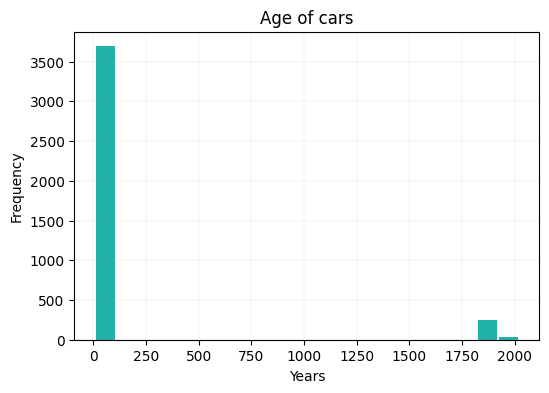

In [ ]:
# histogram and a boxplot to show the age of cars
plt.figure(figsize=(6,4))
df_orig['age_of_car'].plot.hist(grid=True, 
                        bins=20, # number of bars
                        rwidth=0.9,
                        color='lightseagreen')
plt.title('Age of cars')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.grid(linestyle='-', linewidth=0.1)

<Axes: xlabel='age_of_car'>

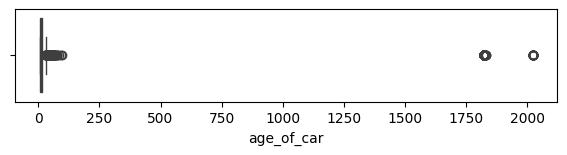

In [ ]:
# Boxplot of price per horsepower
plt.figure(figsize=(7,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_orig['age_of_car'], color="lightseagreen")

## Create a dictionary with all prices per make

In [ ]:
# Use set and dictionary comprehension to create a dictionary
car_dict = {year: df_orig.loc[df_orig['year'] == year, 'Price'].tolist() \
            for year in set(df_orig['year'])}

# Print the resulting dictionary keys and values
print('Dictionary with keys and values:')
print(car_dict)

# Print the resulting dictionary keys
print('\nDictionary keys:')
print(car_dict.keys())

# Print the resulting dictionary values
print('\nDictionary values')
print(car_dict.values())

Dictionary with keys and values:
{2: ["CHF 19'800.–", "CHF 54'900.–", "CHF 4'490.–", "CHF 2'500.–", "CHF 2'999.–", "CHF 5'500.–", "CHF 26'500.–", "CHF 53'800.–", "CHF 126'900.–", "CHF 42'900.–", "CHF 19'000.–", "CHF 1'500.–", "CHF 6'500.–", "CHF 62'499.–", "CHF 6'500.–", "CHF 22'000.–", "CHF 9'900.–", "CHF 56'500.–", "CHF 8'000.–", "CHF 4'290.–", "CHF 26'200.–", "CHF 55'000.–", "CHF 2'500.–", "CHF 30'900.–", "CHF 3'500.–", "CHF 5'200.–", "CHF 21'000.–", "CHF 4'800.–", "CHF 19'500.–", "CHF 2'800.–", "CHF 18'490.–", "CHF 12'000.–", "CHF 19'500.–", 'CHF 600.–', "CHF 72'500.–"], 1929: ["CHF 35'000.–"], 1931: ["CHF 31'900.–"], 1938: ["CHF 54'000.–"], 1946: ["CHF 40'000.–"], 1947: ["CHF 12'000.–"], 1948: ["CHF 15'000.–"], 1953: ["CHF 53'535.–"], 1956: ["CHF 23'900.–", "CHF 38'000.–"], 1958: ["CHF 39'500.–", "CHF 13'900.–"], 1959: ["CHF 42'000.–", "CHF 49'000.–"], 1961: ["CHF 24'999.–"], 1962: ["CHF 64'000.–", "CHF 126'000.–", "CHF 112'900.–", "CHF 32'800.–"], 1963: ["CHF 20'000.–", "CHF 49'6